In [20]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df = pd.read_csv("train_users_2.csv")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162035 entries, 0 to 162034
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       162035 non-null  object 
 1   date_account_created     162034 non-null  object 
 2   timestamp_first_active   162034 non-null  float64
 3   date_first_booking       69208 non-null   object 
 4   gender                   162034 non-null  object 
 5   age                      96849 non-null   float64
 6   signup_method            162034 non-null  object 
 7   signup_flow              162034 non-null  float64
 8   language                 162034 non-null  object 
 9   affiliate_channel        162034 non-null  object 
 10  affiliate_provider       162034 non-null  object 
 11  first_affiliate_tracked  156165 non-null  object 
 12  signup_app               162034 non-null  object 
 13  first_device_type        162034 non-null  object 
 14  firs

In [24]:
df[df.age > 120]['age'].describe()

count     717.000000
mean     2007.089261
std        99.404022
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [25]:
df[df.age < 18]['age'].describe()

count    129.000000
mean      11.441860
std        6.029753
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [26]:
df['age'] = df['age'].apply(lambda x: np.nan if x > 120 else x)

In [27]:
df["first_affiliate_tracked"].fillna("unknown",inplace=True) 
df["age"].fillna("0",inplace=True) 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162035 entries, 0 to 162034
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       162035 non-null  object 
 1   date_account_created     162034 non-null  object 
 2   timestamp_first_active   162034 non-null  float64
 3   date_first_booking       69208 non-null   object 
 4   gender                   162034 non-null  object 
 5   age                      162035 non-null  object 
 6   signup_method            162034 non-null  object 
 7   signup_flow              162034 non-null  float64
 8   language                 162034 non-null  object 
 9   affiliate_channel        162034 non-null  object 
 10  affiliate_provider       162034 non-null  object 
 11  first_affiliate_tracked  162035 non-null  object 
 12  signup_app               162034 non-null  object 
 13  first_device_type        162034 non-null  object 
 14  firs

In [29]:
df.date_account_created = df.date_account_created.astype('datetime64')
df.date_first_booking = df.date_first_booking.astype('datetime64')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162035 entries, 0 to 162034
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       162035 non-null  object        
 1   date_account_created     162034 non-null  datetime64[ns]
 2   timestamp_first_active   162034 non-null  float64       
 3   date_first_booking       69208 non-null   datetime64[ns]
 4   gender                   162034 non-null  object        
 5   age                      162035 non-null  object        
 6   signup_method            162034 non-null  object        
 7   signup_flow              162034 non-null  float64       
 8   language                 162034 non-null  object        
 9   affiliate_channel        162034 non-null  object        
 10  affiliate_provider       162034 non-null  object        
 11  first_affiliate_tracked  162035 non-null  object        
 12  signup_app      

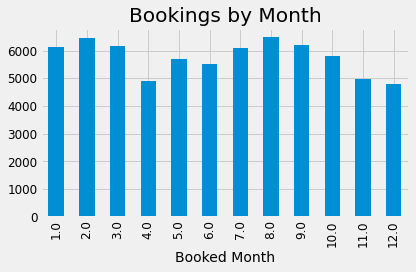

In [32]:
df.groupby(df["date_first_booking"].dt.month)['id'].count().plot(kind='bar')
plt.xlabel("Booked Month")
plt.title("Bookings by Month")
plt.tight_layout()
plt.savefig("Monthly")
plt.show()

In [33]:
df_without_NDF = df[df['country_destination']!='NDF']

There is a huge jump in account creation after 2014. Airbnb has grown leaps and bounds after 2014

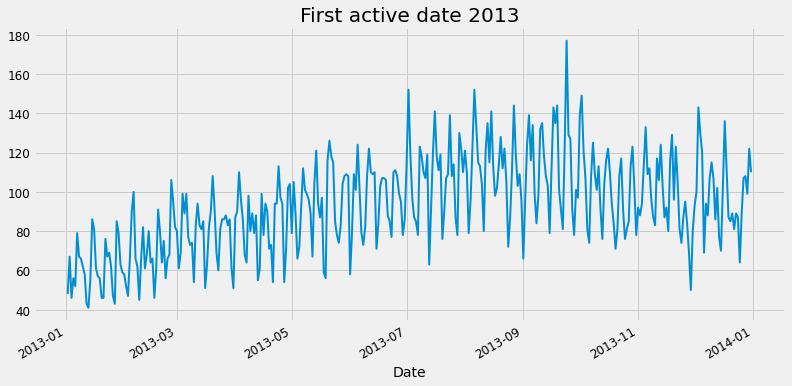

In [35]:
#Creating a separate dataframe for the year 2013 to analyse it further.
df_2013 = df_without_NDF[df_without_NDF['timestamp_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
df_2013 = df_2013[df_2013['timestamp_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
plt.figure(figsize=(12,6))
df_2013.timestamp_first_active.value_counts().plot(kind='line', linewidth=2)
plt.xlabel('Date')
plt.title('First active date 2013')
plt.show()

If we see month wise activty of the users then the peak months were July, August and October. On the other hand, least active month was December

In [36]:
df['date_first_booking'].min(), df['date_first_booking'].max()

(Timestamp('2010-01-02 00:00:00'), Timestamp('2015-03-13 00:00:00'))

we have booking through 6 years (2010-2015)

# Indexing with Time Series Data

In [37]:
df = df.set_index('date_first_booking')
df.index

DatetimeIndex([       'NaT',        'NaT', '2010-08-02', '2012-09-08',
               '2010-02-18', '2010-01-02', '2010-01-05', '2010-01-13',
               '2010-07-29', '2010-01-04',
               ...
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT', '2014-03-13', '2014-03-13',        'NaT',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='date_first_booking', length=162035, freq=None)